We are going to see the a mini projects where we will be using `Google Cloud Vision API` for extracting the text from the image.<br>  
 
To start with we have to get an `API-key` of `Google-Cloud-Vision` in order to use their services. 

#### Setting Up Your Google Platform Account

<a href = "https://console.cloud.google.com/home/dashboard"> Google Cloud Platform Free </a> An account is required to get an api-key.json file.

* Sign-in to Google Cloud Console
* Click “API Manager”
* Click “Credentials”
* Click “Create Credentials”
* Select “Service Account Key”
* Under “Service Account” select “New service account”
* Name service (whatever you’d like)
* Select Role: “Project” -> “Owner”
* Leave “JSON” option selected
* Click “Create”
* Save generated API key file
* Rename file to api-key.json

## Install prerequisites

Install the requirements.txt file using pip command which contains the required libraries. 

`pip install -r requirements.txt`

In [51]:
#Import all the necessary package
import cv2
import imutils
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import requests
import time
from base64 import b64encode
from IPython.display import Image
from pylab import rcParams
import io
from google.cloud import vision
from google.cloud.vision import types

>You will most likely run into an error if `GOOGLE_APPLICATION_CREDENTIALS` environment variable is not set. This is because these libraries use `Application Default Credentials (ADC)` to locate your application's credentials. When your code uses libraries like this, the strategy checks for your credentials. 


Follow <a href= 'https://console.cloud.google.com/apis/credentials'>this link </a> to learn how to generate <b>`GOOGLE_APPLICATION_CREDENTIALS`</b>. You aim to generate a `api-key.json` file which you will use for authentication purpose.
Once `api-key.json` is obtained, you will execute the following code to set the `GOOGLE_APPLICATION_CREDENTIALS` environment variable.

In [53]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="G:/AllStuff E Drive/HGS_mini_project/api-key.json"

The next step is to call ImageAnnotatorClient() which contains the utilities for extracting image properties.


In [54]:
client = vision.ImageAnnotatorClient()

Now we will write code for reading an image through a given path.

In [55]:
path = 'G:/AllStuff E Drive/HGS_mini_project/picture1.jpg'
with io.open(path, 'rb') as image_file:
        content = image_file.read()

Now, we will instantiate an object of type `vision.types.Image` and you will supply `content=content` as its argument. <br> 
Also, we are showing the raw image for easy analysis. 

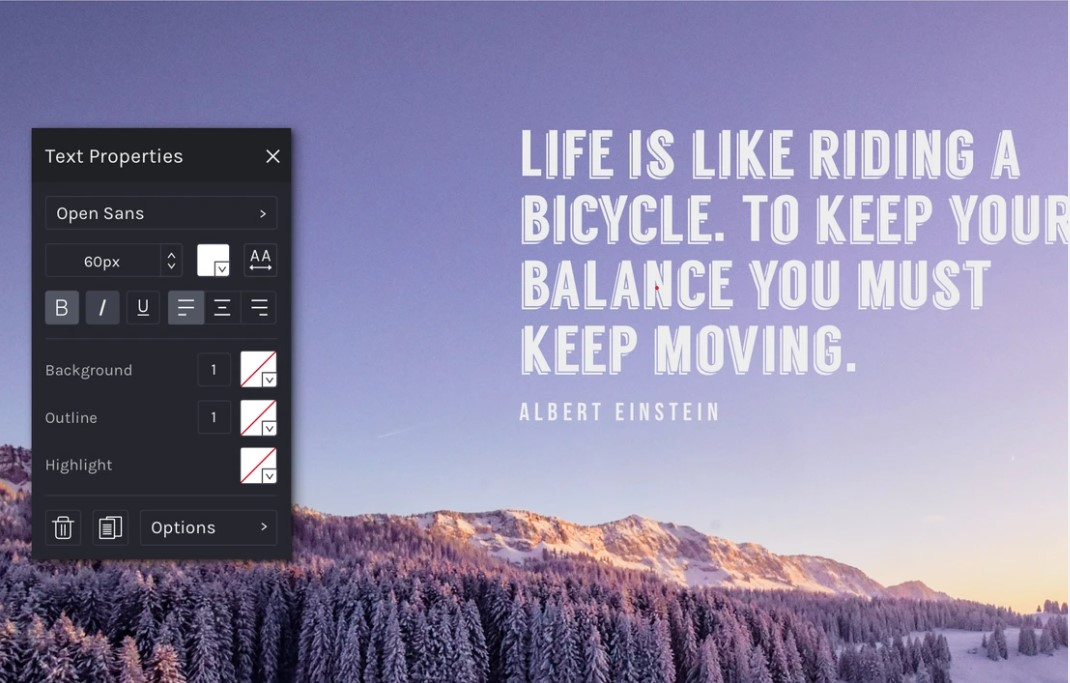

In [56]:
image = vision.types.Image(content=content)
Image(path)


We are only left with the last two steps of our `Image Properties detection` application. In these steps,<br> 
we will:

> * Call `client.image_properties` with as `(image=image)` argument. <br>
> * Store the response of `image_properties()` in a variable `response` and extract the image properties by calling the `image_properties_annotation` argument of `response`. <br>
> * Display several properties of the images in a formatted manner. <br>

In [57]:
response = client.image_properties(image=image)
props = response.image_properties_annotation
print('Properties of the image:')

for color in props.dominant_colors.colors:
    print('Fraction: {}'.format(color.pixel_fraction))
    print('\tr: {}'.format(color.color.red))
    print('\tg: {}'.format(color.color.green))
    print('\tb: {}'.format(color.color.blue))

Properties of the image:
Fraction: 0.14749999344348907
	r: 186.0
	g: 188.0
	b: 219.0
Fraction: 0.0890277773141861
	r: 156.0
	g: 155.0
	b: 200.0
Fraction: 0.08486111462116241
	r: 42.0
	g: 42.0
	b: 50.0
Fraction: 0.04236111044883728
	r: 162.0
	g: 164.0
	b: 201.0
Fraction: 0.04715277627110481
	r: 140.0
	g: 142.0
	b: 195.0
Fraction: 0.15388889610767365
	r: 127.0
	g: 126.0
	b: 182.0
Fraction: 0.032083332538604736
	r: 224.0
	g: 223.0
	b: 250.0
Fraction: 0.03361111134290695
	r: 188.0
	g: 183.0
	b: 223.0
Fraction: 0.0404166653752327
	r: 130.0
	g: 124.0
	b: 164.0
Fraction: 0.047430556267499924
	r: 234.0
	g: 231.0
	b: 242.0


We will use the `text_detection()` function to detect the text from the image in `text_response` variable. We are extracting text from the image and finally printing them with the help of a for loop.<br> 
Read more aboout it <a href = 'https://cloud.google.com/vision/docs/fulltext-annotations'><b>here<b></a>

In [58]:
text_response = client.text_detection(image=image)

texts = [text.description for text in text_response.text_annotations]

#print all the extracted text from the image
for text in texts:
	print(text)
	break

LIFE IS LIKE RIDING A
BICYCLE. TO KEEP YOUR
BALANCE YOU MUST
KEEP MOVING.
Text Properties
Open Sans
AA
60px
В
U
Background
1
ALBERT EINSTEIN
Outline
1
Highlight
Options



### Reference

1. https://cloud.google.com/translate/docs/hybrid-glossaries-tutorial
2. https://www.dataquest.io/blog/jupyter-notebook-tutorial/
3. www.datacamp.com 
4. https://cloud.google.com/vision/docs